# Receding-horizon timelapse visualization for DFW

In [1]:
import matplotlib.mlab as mlab
import subprocess

# import osmnx as ox    # Use 0.5.4, NOT 0.6 (0.6 depends on nx2.0)
import networkx as nx # Use 1.11, NOT 2.0 (2.0 is not backwards-compatible!)
import numpy as np
# import pandas as pd
# import geopandas as gpd
# from shapely.geometry import Point
from matplotlib import rcParams  
# from collections import Set
# import time
# import fiona
# import simplify
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pickle
# import glob
# from itertools import compress
# import ctypes
# import multiprocessing as mp
#from multiprocessing import Pool, cpu_count, TimeoutError, Value, Array

# import csv

# from sklearn.neighbors import NearestNeighbors
# from sklearn.cluster import KMeans

import os

# matlab io
# import scipy.io as sio
# from scipy.sparse import csr_matrix
import h5py

%matplotlib inline
rcParams['figure.figsize'] = (10, 10) #Size of figure  
rcParams['figure.dpi'] = 125

## Select the appropriate input file to plot

In [2]:
# We will plot a timelapse with data from the file RTFile

#RTFileP = 'DFWSim_PAMoD_10h_12-Jan-2018 15:50:19.mat'
#RTFileG = 'DFWSim_GREEDY_10h_13-Jan-2018 02:51:33.mat'

RTFile="old_DFWSim_PAMoD_10h_12-Jan-2018_155019.mat"

In [3]:
plotsdir = 'timelapse/'

In [4]:
with h5py.File(RTFile, 'r') as log_file:
    nclusters = len(np.array(log_file['RoadGraph']))
    PowerPricesLog = np.array(log_file['Stats']['PowerPricesLog'])
    MovingCarsCharge = np.array(log_file['Stats']['MovingCarsCharge'])
    All_loads_log = np.array(log_file['PowerStats']['All_loads_log'])
    NumIdleCars = np.array(log_file['Stats']['NumIdleCars'])
    IdleCarCharge = np.array(log_file['Stats']['IdleCarCharge'])
    C = np.array(log_file['C'])
    #numCarsOnLink = np.array(log_file['Stats']['numCarsOnLink'])
    NumMovingCars = np.array(log_file['Stats']['NumMovingCars'])
    MovingCarsCharge = np.array(log_file['Stats']['MovingCarsCharge'])
    NumChargingCars = np.array(log_file['Stats']['NumChargingCars'])
    NumDischargingCars = np.array(log_file['Stats']['NumDischargingCars'])
    Tmax = np.array(log_file['settings']['Tmax'])
    vehicleStateLog = np.array(log_file['Stats']['vehicleStateLog'])
    ControllerMode_ = np.array(log_file['settings']['ControllerMode'])
    dt = np.array(log_file['settings']['dt'])

In [5]:
data_dir = '../../case_studies/Dallas_Fort-Worth/Data/'

road_data_dir = data_dir+'road_network/'

power_data_dir = data_dir+'power_network/'

figure_data_dir = data_dir+'fig/'

emissions_data_dir = data_dir+'emissions/'

commute_data_dir = data_dir+'commuting_data/'

scenario_dir = 'scenario/'

In [6]:
outputS = open(road_data_dir+'SourcesGraph_'+str(nclusters)+'_v2.pkl', 'rb')
SourcesGraph=pickle.load(outputS)
outputS.close()

outputnp = open(road_data_dir+'NodePos_'+str(nclusters)+'_v2.pkl', 'rb')
nodepos = pickle.load(outputnp)
outputnp.close()

outputG = open(power_data_dir+'Gpower_'+str(nclusters)+'_v2.pkl', 'rb')
Gpower=pickle.load(outputG)
outputG.close()

outputD = open(power_data_dir+'isbusinDallas'+str(nclusters)+'_v2.pkl', 'rb')
isbusinDallas=pickle.load(outputD)
outputD.close()

outputC = open(power_data_dir+'isbusaCharger'+str(nclusters)+'_v2.pkl', 'rb')
isbusaCharger=pickle.load(outputC)
outputC.close()

outputPNP = open(power_data_dir+'Pnodepos_'+str(nclusters)+'_v2.pkl', 'rb')
pnodepos_plot = pickle.load(outputPNP)
outputPNP.close()

inputcCT = open(road_data_dir+'DFWCounties.pkl', 'rb')
ctboundaries=pickle.load(inputcCT)

In [7]:
StrCM=ControllerMode_.view('c')
ControllerMode=''
for i in range(len(StrCM)):
    ControllerMode+=StrCM[i][0]
ControllerMode

'PAMoD'

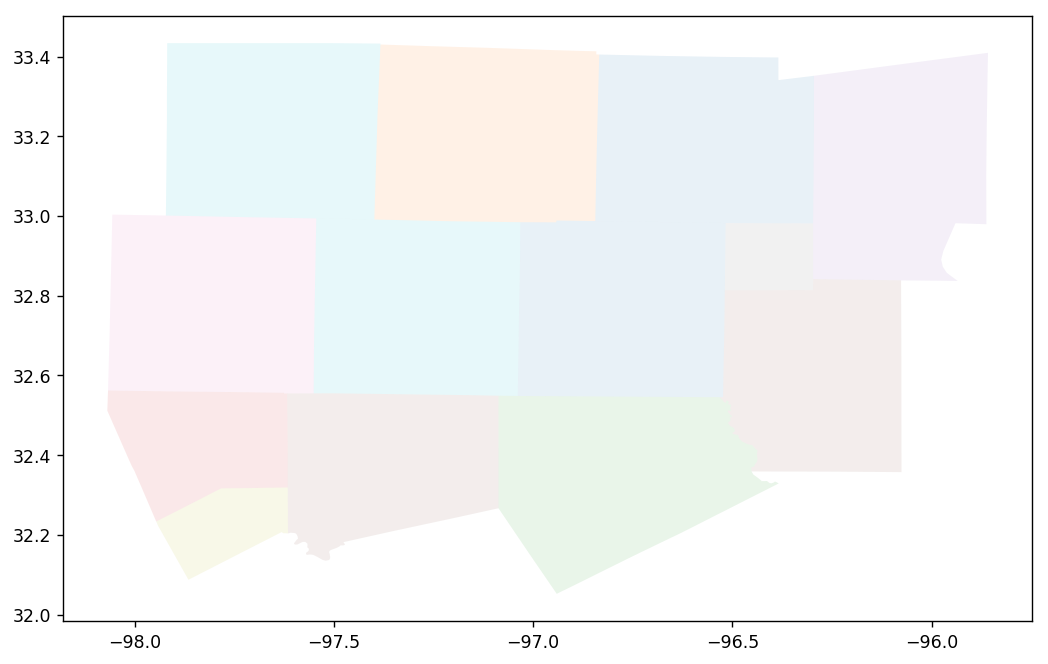

In [8]:
myax = ctboundaries.plot(column='place_name',categorical=True,alpha=.1,)
xlim_DFW = myax.get_xlim()
ylim_DFW = myax.get_ylim()

0


/home/frossi/Documents/PhD/amodenv/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590


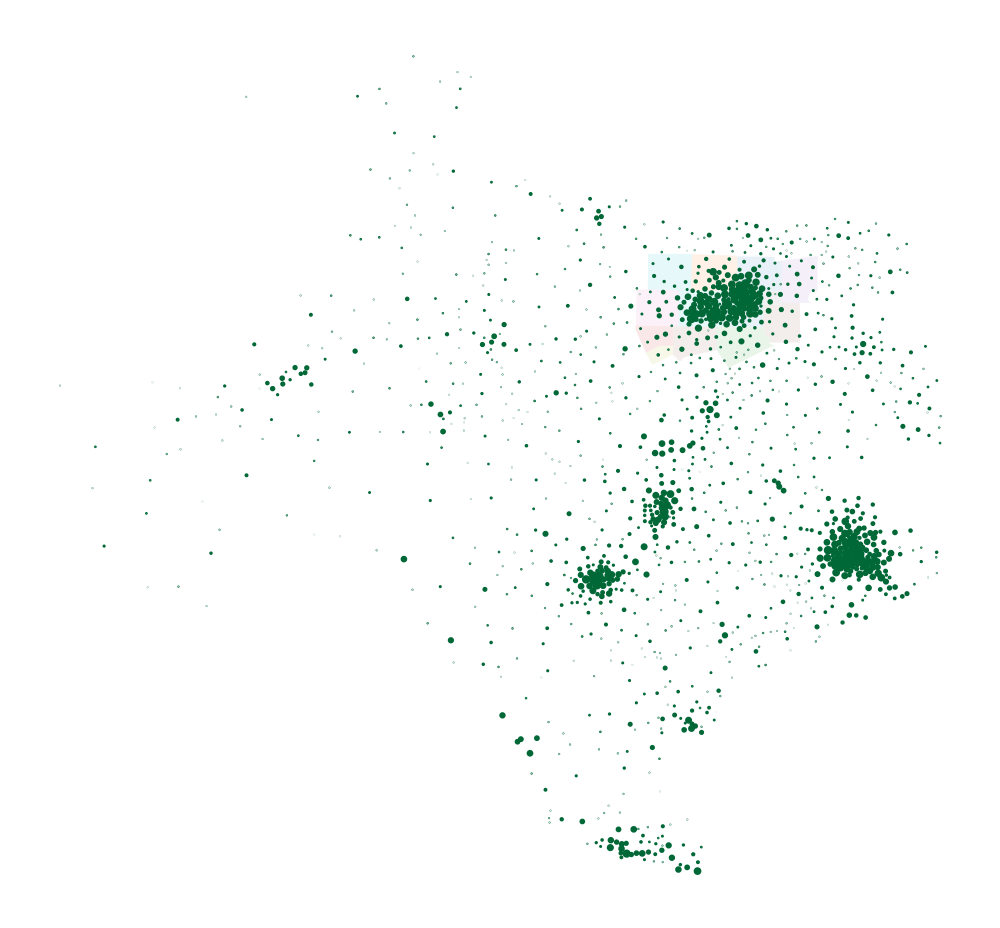

In [9]:
# Power network

minprice_color=70.
maxprice_color=100.

nodesizescale=7.


tplotmin=0
tplotmax=Tmax
myaxis = plt.axes()

for timeplot in range(tplotmin,tplotmax):
    if not timeplot%10:
        print timeplot
    myaxis.clear()
    #P-AMoD
    #myaxis = axes[1][axisct]
    #ctboundaries.plot(ax=myaxis)
    
    nd = nx.draw_networkx_nodes(Gpower,pnodepos_plot,node_size=nodesizescale*abs(All_loads_log[timeplot,:]),
                                node_color=PowerPricesLog[timeplot,:]/100.,ax=myaxis,arrows=False,
                                cmap=plt.cm.RdYlGn_r,vmin=minprice_color,
                                vmax=maxprice_color)    
    myaxis.set(adjustable='box-forced', aspect='equal')
    
    #myaxis.set_xlim(xlim_Dallas)
    #myaxis.set_ylim(ylim_Dallas)
    myaxis.set_xticks([])
    myaxis.set_yticks([])
    ctboundaries.plot(column='place_name',categorical=True,alpha=.1,ax=myaxis)
    myaxis.axis('off')
    plt.savefig(plotsdir+'LMP_TX_'+ControllerMode+'_t'+'{:04}'.format(timeplot)+'.png',bbox_inches='tight',transparent=False,dpi=300)
    
#plt.savefig('LMPs_TX4.pdf',bbox_inches='tight',transparent=True)

In [10]:
BashCall= 'ffmpeg -framerate 24 -i '+plotsdir+'LMP_TX_'+ControllerMode+'_t%04d.png -vf scale=1920:-2 -pix_fmt yuv420p LMP_TX_'+ControllerMode+'_movie.mp4'

print BashCall

subprocess.call(BashCall.split())



ffmpeg -framerate 24 -i timelapse/LMP_TX_PAMoD_t%04d.png -vf scale=1920:-2 -pix_fmt yuv420p LMP_TX_PAMoD_movie.mp4


0

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590


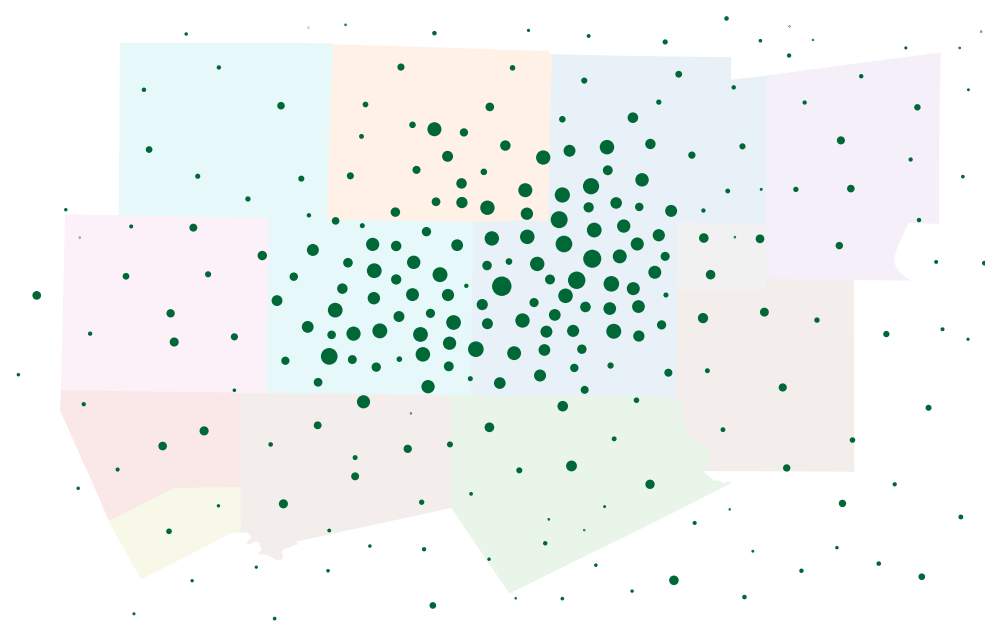

In [11]:
# Power network, zoomed on DFW

minprice_color=70.
maxprice_color=100.

nodesizescale=30

tplotmin=0
tplotmax=Tmax
myaxis = plt.axes()

for timeplot in range(tplotmin,tplotmax):
    if not timeplot%10:
        print timeplot
    myaxis.clear()
    #P-AMoD
    #myaxis = axes[1][axisct]
    #ctboundaries.plot(ax=myaxis)
    
    nd = nx.draw_networkx_nodes(Gpower,pnodepos_plot,node_size=nodesizescale*abs(All_loads_log[timeplot,:]),
                                node_color=PowerPricesLog[timeplot,:]/100.,ax=myaxis,arrows=False,
                                cmap=plt.cm.RdYlGn_r,vmin=minprice_color,
                                vmax=maxprice_color)    
    myaxis.set_xlim(xlim_DFW)
    myaxis.set_ylim(ylim_DFW)
    
    

    myaxis.set_xticks([])
    myaxis.set_yticks([])
    ctboundaries.plot(column='place_name',categorical=True,alpha=.1,ax=myaxis)
    myaxis.set(adjustable='box-forced', aspect='equal')
    myaxis.axis('off')
    plt.savefig(plotsdir+'LMP_DFW_'+ControllerMode+'_t'+'{:04}'.format(timeplot)+'.png',bbox_inches='tight',transparent=False,dpi=300)
    
#plt.savefig('LMPs_TX4.pdf',bbox_inches='tight',transparent=True)

In [ ]:
BashCall= 'ffmpeg -framerate 24 -i '+plotsdir+'LMP_DFW_'+ControllerMode+'_t%04d.png -vf scale=1920:-2 -pix_fmt yuv420p LMP_DFW_'+ControllerMode+'_movie.mp4'

print BashCall

subprocess.call(BashCall.split())



ffmpeg -framerate 24 -i timelapse/LMP_DFW_PAMoD_t%04d.png -vf scale=1920:-2 -pix_fmt yuv420p LMP_DFW_PAMoD_movie.mp4


0

In [ ]:
# Road network

myaxis=ctboundaries.plot(alpha=0.5,linewidth=1)
nodelabels={}
myedgelist=SourcesGraph.edges()
nodescale=.1
edgescale=.004

tplotmin=0
tplotmax=Tmax

#tplotmin=100
#tplotmax=101

myaxis = plt.axes()
for timeplot in range(tplotmin,tplotmax):
    if not timeplot%10:
        print timeplot
    myaxis.clear()
    mychargelist=np.zeros(len(myedgelist))
    mynumvlist = np.zeros(len(myedgelist))
    for e in range(len(myedgelist)):
        mychargelist[e]=np.nan_to_num(MovingCarsCharge[myedgelist[e][1],myedgelist[e][0],timeplot])
        mynumvlist[e] = np.nan_to_num(NumMovingCars[myedgelist[e][1],myedgelist[e][0],timeplot])
        
    nx.draw(SourcesGraph,nodepos,ax=myaxis,node_alpha=0.1,
            node_color=IdleCarCharge[:,timeplot],
            node_size=nodescale*NumIdleCars[:,timeplot],vmin=0.,vmax=20,
            edgelist = myedgelist,
            edge_color = mychargelist,
            edve_vmin= 0., edge_vmax=20,
            #edge_color=np.random.rand(len(SourcesGraph.edges())),
            width = edgescale*mynumvlist,
            #width = 5*np.random.rand(len(SourcesGraph.edges())),
            edge_cmap=plt.cm.RdYlGn,
            cmap=plt.cm.RdYlGn,
            arrows=False)
    
    nx.draw_networkx_nodes(SourcesGraph,nodepos,ax=myaxis,
            node_color='g',node_shape='^',
            node_size=nodescale*NumChargingCars[:,timeplot])
    nx.draw_networkx_nodes(SourcesGraph,nodepos,ax=myaxis,
            node_color='r',node_shape='v',
            node_size=nodescale*NumDischargingCars[:,timeplot])
    
    myaxis.set(adjustable='box-forced', aspect='equal')
    
    ctboundaries.plot(column='place_name',categorical=True,alpha=.1,ax=myaxis)
    plt.savefig(plotsdir+'Roads_TX_thin_'+ControllerMode+'_t'+'{:04}'.format(timeplot)+'.png',bbox_inches='tight',transparent=False,dpi=300)
#ctboundaries.plot(alpha=0.1,linewidth=1,ax=myaxis)

0


/home/frossi/Documents/PhD/amodenv/local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/frossi/Documents/PhD/amodenv/local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/frossi/Documents/PhD/amodenv/local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:526: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  for c in edge_color]):
/home/frossi/Documents/PhD/amodenv/local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:532: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  for c in edge_color]):
/home

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450


In [ ]:
BashCall= 'ffmpeg -framerate 24 -i '+plotsdir+'Roads_TX_thin_'+ControllerMode+'_t%04d.png -vf scale=1920:-2 -pix_fmt yuv420p Roads_TX_thin_t_'+ControllerMode+'_movie.mp4'

print BashCall

subprocess.call(BashCall.split())



In [ ]:

tplotmin=0
tplotmax=Tmax

startHour=5;

myaxis = plt.axes()
for timeplot in range(tplotmin,tplotmax):
    if not timeplot%10:
        print timeplot
    myaxis.clear()
    DispHour = np.int(np.floor(timeplot*dt/3600));
    DispMin  = np.int(np.floor(timeplot*dt/60)-60*DispHour);
    DispSec  = np.int(timeplot*dt-60*DispMin-60*60*DispHour);
    #print '{0:02}:{1:02}:{2:02}'.format(DispHour,DispMin,DispSec)
    #print '{0:02}:{1:02}:{2:02}'.format(DispHour,DispMin,DispSec)
    DispHour = DispHour + startHour
    if DispHour<12:
        myaxis.text(0,1,'{0:02}:{1:02} a.m.'.format(DispHour,DispMin),fontsize=48)
    elif DispHour==12:
        myaxis.text(0,1,'{0:02}:{1:02} p.m.'.format(DispHour,DispMin),fontsize=48)
    else:
        myaxis.text(0,1,'{0:02}:{1:02} p.m.'.format(DispHour-12,DispMin),fontsize=48)
    #myaxis.set(adjustable='box-forced')
    myaxis.axis('off')
    #plt.tight_layout()
    myaxis.set_xlim([0, .2])
    plt.savefig(plotsdir+'Timer_t'+'{:04}'.format(timeplot)+'.png',bbox_inches='tight',transparent=False,dpi=300)

In [ ]:
BashCall= 'ffmpeg -framerate 24 -i '+plotsdir+'Timer_t%04d.png -vf scale=1920:-2 -pix_fmt yuv420p Timer_movie.mp4'

print BashCall

subprocess.call(BashCall.split())

